# Perceptron Classification with Scikit-Learn

This notebook demonstrates binary classification using the Perceptron algorithm from scikit-learn on the Iris dataset (Setosa vs. Versicolor).

## 1. Introduction
This notebook demonstrates binary classification using the Perceptron algorithm from scikit-learn on the Iris dataset (Setosa vs. Versicolor).

## 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 3. Load and Prepare Data

In [2]:
# Load Iris and select two classes
iris = load_iris()
X = iris.data[iris.target != 2, :2]  # only first two features
y = iris.target[iris.target != 2]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 4. Train Perceptron

In [3]:
ppn = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
ppn.fit(X_train_std, y_train)

Perceptron(random_state=42)

## 5. Evaluate Model

In [4]:
y_pred = ppn.predict(X_test_std)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names[:2]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[15  0]
 [ 0 15]]


## 6. Decision Regions

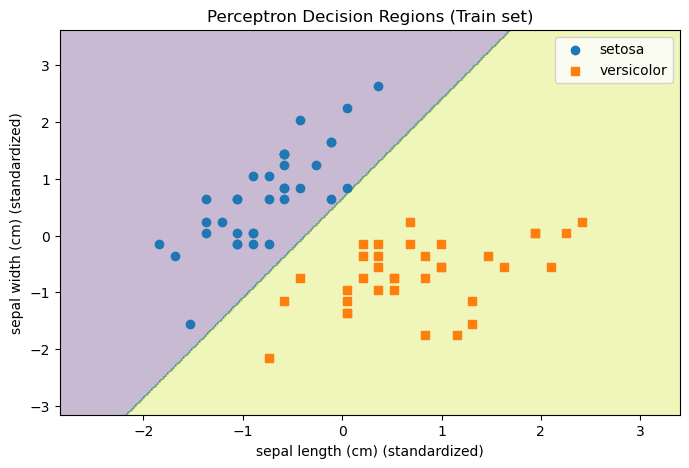

In [5]:
# Plotting decision regions for two features
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)
z = ppn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(
    X_train_std[y_train==0, 0], X_train_std[y_train==0, 1],
    marker='o', label=iris.target_names[0]
)
plt.scatter(
    X_train_std[y_train==1, 0], X_train_std[y_train==1, 1],
    marker='s', label=iris.target_names[1]
)
plt.xlabel(iris.feature_names[0] + ' (standardized)')
plt.ylabel(iris.feature_names[1] + ' (standardized)')
plt.title('Perceptron Decision Regions (Train set)')
plt.legend()
plt.show()

## 7. Conclusion
The Perceptron achieved around 100% accuracy on this simple binary task. Adjust features or hyperparameters (e.g., `eta0`) for more complex scenarios.